# Autolib dataset EDA and hyothesis testing

## Objectives of the analysis

The objectives of this analysis are:
1. to make observations about number of cars taken from an autolib station and  how that relates to differences in location and days of the week.
2. to test my hypothesis and come to an appropriate decision.

## Metrics of success

To consider this analysis successful, I should have been able come to a decision to either reject or fail to reject my null hypothesis and have been able to make appropriate inferences in regards to my findings.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting standard parameters for my visualizations by matplotlib
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 700
plt.rcParams['axes.labelsize'] = 12

## Loading our data

In [3]:
Autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')


## Checking our data

In [4]:
# checking the shape of our data
print('Our dataset has', Autolib.shape[0],'rows and', Autolib.shape[1],'columns.')

Our dataset has 16085 rows and 13 columns.


In [5]:
# checking the head of our data
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# checking the tail end of our dataset
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# checking the data types of our dataframe columns
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [8]:
# checking the values for returned and taken in the numerical variables describing the different cars.
# the columns for returned and taken, ideally should be equal, assuming the cars are taken and returned on the same day.
continous_variables =Autolib.iloc[:,5:13]
print(continous_variables.sum())

# the difference between the returned and taken for the different electric cars is present but very small, relative to the colletive data points for each car.
# as the difference is small during my analysis, I shall use the taken columns for the different cars, as plotting both would be
# redundant due to their similarity. Another reason why I picked the taken columns was that, I am generally more interested in the car taken that day.

 


BlueCars_taken_sum        2025535
BlueCars_returned_sum     2025306
Utilib_taken_sum            59487
Utilib_returned_sum         59500
Utilib_14_taken_sum        138340
Utilib_14_returned_sum     138318
Slots_freed_sum            363988
Slots_taken_sum            363992
dtype: int64


## Tidying our dataset

In [9]:
# By displaying the data types, I have been able to observe that the date column has been assigned an object data type. This needs to be a date type datatype instead.
Autolib['date'] = pd.to_datetime(Autolib['date'])



In [10]:
# detecting missing values in the dataset
Autolib.isnull().sum()

# there are no missing values in this dataset.

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
# detecting anomalies in the dataset

print(pd.unique(Autolib['day_type']))
print('\n')
print(pd.unique(Autolib['dayOfWeek']))

# the two above are discrete variables meaning only a few specified values are qualified. No anomalies were detected in the two columns

['weekday' 'weekend']


[0 1 2 3 4 5 6]


In [12]:
# there are no duplicated records in this dataset.

Autolib.duplicated().any()

False

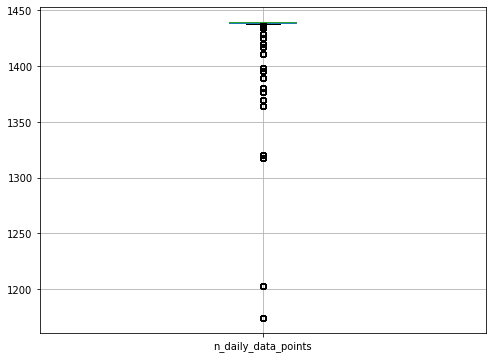

In [13]:
# detecting outliers.
# plotting a boxplot to observe outliers in the number of daily data points.
def plot_box(n):
 Autolib.boxplot(column=n, grid=True)

plot_box('n_daily_data_points')
# the outliers seem to be on the lower side.

In [14]:
# as I am only interested in the bluecars when testing my hypothesis, I am going to create another dataset only picking data relating to blue cars.

Blue_cars = Autolib.iloc[:,0:7]
Blue_cars

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,1440,0,weekday,110,103
1,75001,2018-01-02,1438,1,weekday,98,94
2,75001,2018-01-03,1439,2,weekday,138,139
3,75001,2018-01-04,1320,3,weekday,104,104
4,75001,2018-01-05,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10
16081,95880,2018-06-16,1440,5,weekend,19,19
16082,95880,2018-06-17,1440,6,weekend,33,35
16083,95880,2018-06-18,1440,0,weekday,11,14


## Univariate analysis

Text(0.5, 1.0, 'Mean number of cars taken per day')

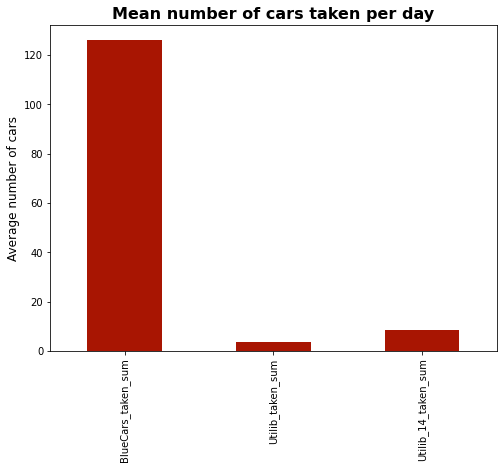

In [15]:
# plotting the average number of cars taken and returned per day.

# the columns I require are bluecars, utilib and utilib 14 sums for the cars taken that day.
cars = Autolib.iloc[:,5:11:2]   # -------picking the rows indexes from 5 to 10 adn taking two steps.

# finding the mean of the number of cars.
averages = cars.mean()

# plotting the bar graph
averages.plot(kind= 'bar', color='#A81502')
plt.ylabel("Average number of cars")
plt.title("Mean number of cars taken per day")

# bluecars seem to be way more popular among customers that the other electric cars.

In [16]:
# finding the modal postal code for blue cars, i.e, the postal code with the highest number of bluecars having been borrowed.
modal_code = Autolib.iloc[:,0:8:2]
mode_code = modal_code.groupby(by='Postal code').sum().sort_values(by='BlueCars_returned_sum', ascending= False)
pcm = pd.DataFrame(mode_code) # -----pcm for postal code mode
pcm

# that postal code is 75015.

,n_daily_data_points,BlueCars_returned_sum
Postal code,,
75015,223281,139943
75016,223281,123222
75017,223281,114541
75013,223281,84449
75019,223281,82023
...,...,...
93150,216155,789
94100,221911,746
93370,213334,556


## Bivariate Analysis


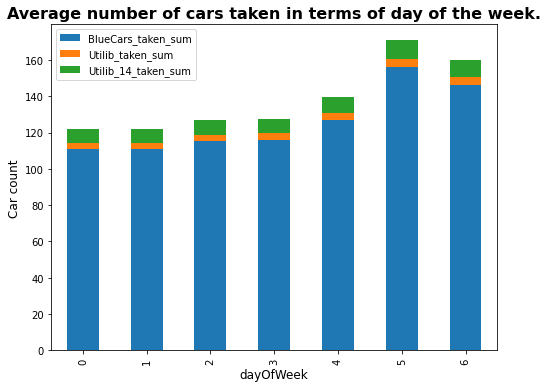

In [17]:
# plotting the number of cars taken on each day of the week.
days = Autolib.iloc[:,3:11:2]  # -------- picking from the dataset, the columns; dayOfWeek, BlueCars_taken_sum, Utilib_taken_sum and Utilib_14_taken_sum

# grouping by the days of the week.
# I prefer using the average as some days may have more entries than others.
days_of_the_week = days.groupby(by='dayOfWeek').mean()

# defining a function for plotting a stacked graph
def plot_stacked(dataset, title):
 dataset.plot(kind='bar', stacked=True)
 plt.title(title)
 plt.ylabel('Car count')
 plt.show()

# executing the function
plot_stacked(days_of_the_week, "Average number of cars taken in terms of day of the week.") 

# five(Saturday) is the day with the highest average number of blue cars having been borrowed.
# Sunday and Friday have the second and third highest average number of blue cars being borrowed.
# Weekdays, other than Friday, don't seem to be very popular.

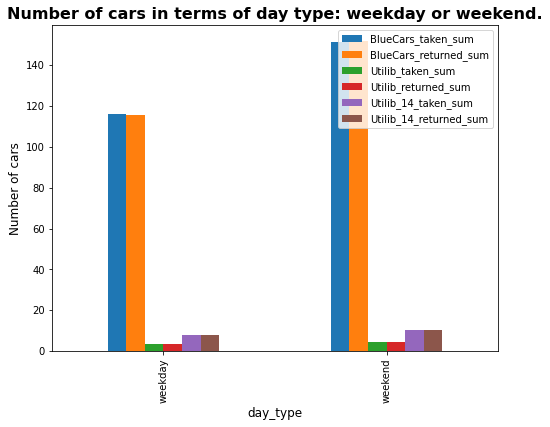

In [18]:
# plotting the number of cars taken during different day types, that is, weekends and weekdays.

day_type = Autolib.iloc[:,4:11]

# grouping the data by day type
dt = day_type.groupby(by='day_type').mean()

# plotting my bar graph
dt.plot(kind='bar')
plt.title("Number of cars in terms of day type: weekday or weekend.")
plt.ylabel("Number of cars")
plt.show()

# The average number of the electric cars being shared in higher during the weekends than the weekdays for all the electric cars.

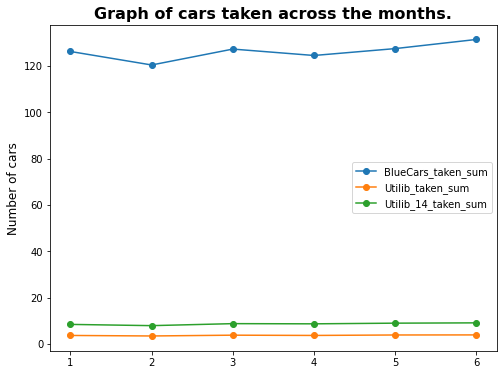

In [19]:
# plotting the total number of cars taken per month.

# selecting the columns I am interested in.
months = Autolib.iloc[:,1:11]

# dropping the unnecessary columns.
months = months.drop('n_daily_data_points', axis=1)
months = months.drop('dayOfWeek', axis=1)

# defining a function for plotting a line graph.
def plot_linegraph(by,column1,column2,column3, title):

  # setting the condition that if by is set to day, the day of the month will be extracted from the date column.
  if by == 'day':
   mwezi = pd.DatetimeIndex(months['date']).day
  # and if by is set to month, the month is extracted from the date column.
  elif by == 'month':
   mwezi = pd.DatetimeIndex(months['date']).month

  m = months.groupby(mwezi).mean()  # mwezi is the extracted day or month, depending on what is specified. The data is grouped by this set parameter.
  x = m.index
  # y,z and a are the car count columns I wish to plot
  y = m[column1]
  z = m[column2]
  a = m[column3]
  # plotting the three line graphs in one graph.
  plt.plot(x,y,marker='o', label= f'{column1}')
  plt.plot(x,z,marker='o', label= f'{column2}')
  plt.plot(x,a,marker='o', label= f'{column3}')
  # setting the title, legend and ylabel
  plt.title(title)
  plt.ylabel('Number of cars')
  plt.legend()
  plt.show()

# executing the function. I specified by month and therefore the the graph will be plotted for the months.
plot_linegraph(by='month',column1='BlueCars_taken_sum',column2='Utilib_taken_sum',column3='Utilib_14_taken_sum',title='Graph of cars taken across the months.')

# The month with highest average of blue cars borrowed appears to be the month of January, followed closely by the month of March.
# June has the lowest average.

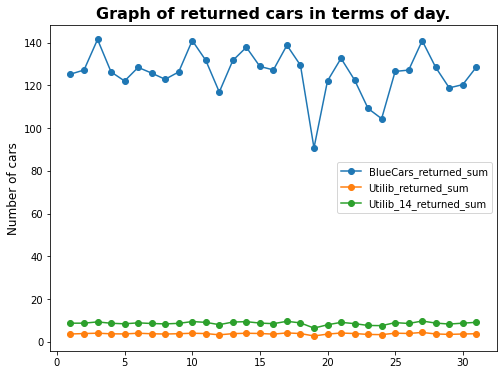

In [20]:
# plotting the graph of the cars by the day on the calender.
# specifying by day, the output display the averages for the days of the month.
plot_linegraph(by='day',column1='BlueCars_returned_sum',column2='Utilib_returned_sum',column3='Utilib_14_returned_sum',title='Graph of returned cars in terms of day.')

# The day with the highest average appears to be the 3rd and the lowest the 31st.

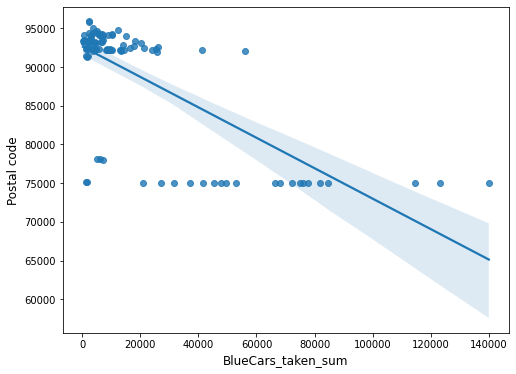

In [21]:
# plotting the number of bluecars returned in terms of postal code
# even though postal code is a dicrete variable, I will use a scatter plot nonetheless as plotting using bar and line, proved to be difficult considering the column has
# 104 discrete values.

# selecting the columns I need. That is, the postal code column and the bluecars borrowed.
blue_postal = Autolib.iloc[:,0:6:5]

# grouping by postal code and aggregating by bluecars_taken_sum
blue_code = blue_postal.groupby(by='Postal code')['BlueCars_taken_sum'].sum()

# creating a dataframe from the grouped and aggregated data.
blue_code = pd.DataFrame(blue_code)

# plotting a scatter plot.
x = blue_code.index 
y = blue_code['BlueCars_taken_sum']
sns.regplot(x=y,y=x, scatter= True)

plt.savefig('pcVsbc.png')

# from observing the scatter plot below, I am able to come to the foollowing conclusion:
#  1. The areas with postal codes between 75000 and 80000, have a higher variation of borrowed cars, meaning a larger variation in customer interactions in comparison
#     to the areas with postal codes between 90000 t0 95000


## Hypothesis Testing

In [22]:
# my null hypothesis states that there is no significant difference in numbers of blue car consumers between the areas with postal codes between 75000 and 80000
# an areas with postal codes between 90000 and 95000.
# my alternative hypothesis states that numbers of blue car consumers are higher in areas with postal codes ranging from 75000-80000 than areas ranging from 90000 to 95000.

blue_postal # ------- contains data columns postal code and BlueCars_taken_sum

seven_to_eight = blue_postal[(blue_postal['Postal code']> 74999)&(blue_postal['Postal code']<80001)]   # ------ picking from the example dataset the two ranges.
nine_to_five = blue_postal[(blue_postal['Postal code']>89999)&(blue_postal['Postal code']<95001)]

print(nine_to_five.shape)  # ---------- the department with postal codes 90000 to 95000 are 11718
print(seven_to_eight.shape) # ------------ the departments with postal codes 75000 to 80000 are 3899

# getting an identifier for both datasets.The identifiers will be used to group. 

nine_to_five['Identifiers'] = 'postal code 90k to 95k'
seven_to_eight['Identifiers'] = 'postal code 75k to 80k'

# merging the two datasets 
my_dataset = pd.concat([seven_to_eight,nine_to_five], axis=0)
my_dataset

# our dataset has 15617 records. A sample of 375 should do.
# finding the ratio of the sample to the population. -------> 0.024012294294678875
print(375/15617)

(11718, 2)
(3899, 2)
0.024012294294678875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


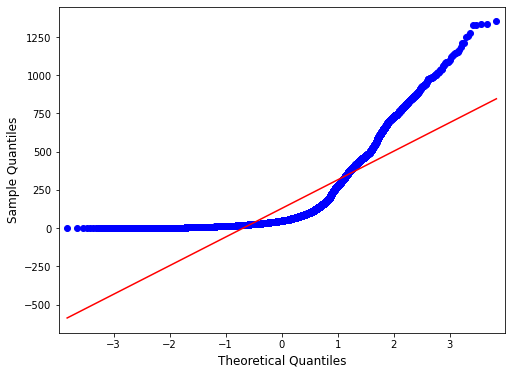

In [23]:
# testing the normality of my dataset.
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# q-q plot
qqplot(my_dataset['BlueCars_taken_sum'], line='s')
pyplot.show()

# from the qq-plot below, the sample distribution does not appear to resemble a normal distribution. 

In [24]:
# I needed to decide on the sampling method I will use to obtain my sample.
# Upon calculation.....I have decided on a sample size of 375.
# my population size is 15617. I decided to use stratified sampling to get a similar ratio for the two postal code ranges to the ratio in the dataset.


sample_x = my_dataset.groupby(by='Identifiers', group_keys=False).apply(lambda y: y.sample(frac=0.024012294294678875))  # ---- the fraction inserted here is the sample to population ratio calculated previously.
sample_x    # ------- our sample size is 375.

,Postal code,BlueCars_taken_sum,Identifiers
310,75002,138,postal code 75k to 80k
771,75005,333,postal code 75k to 80k
2220,75015,781,postal code 75k to 80k
209,75002,190,postal code 75k to 80k
2236,75015,765,postal code 75k to 80k
...,...,...,...
11540,93350,16,postal code 90k to 95k
4590,92100,346,postal code 90k to 95k
4131,91370,5,postal code 90k to 95k
9830,92800,123,postal code 90k to 95k


In [25]:
n =sample_x[sample_x['Identifiers'] == 'postal code 90k to 95k']
s =sample_x[sample_x['Identifiers'] == 'postal code 75k to 80k']
# obtaining the two series for number of blue cars taken 
nines = n['BlueCars_taken_sum']
sevens = s['BlueCars_taken_sum']

In [26]:
# the significance level that I will use is 0.05.
# my confidence level is 0.95 and it's corresponding critical value is 1.96.
# my test is a right tailed test as the alternative hypothesis states that the areas in postal code range 75k t0 80k has their numbers of blue car consumers are greater than
# the areas with posatl codes ranging from 90-95k.
# Therefore in the alternative parameter, we will specify larger, as per my claim that there is a difference and hence it is larger than 0. 

from statsmodels.stats import weightstats as stests

z_score ,pvalue = stests.ztest(sevens, nines, value=0,alternative='larger')
print(float(pvalue))
print('\n')
print(z_score)
if pvalue<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

# the zscore is larger than the critical value and hence out of bounds of the 95% confidence level.
# from the zscore and pvalue , I can reject the null hypothesis in favour of my alternative hypothesis.

1.4874775917206627e-72


17.976538486526366
reject null hypothesis
